# House Prices Regression - Prediction Model

**Student ID:** 202210221  
**Student Name:** Ahmad Abu Ghazaleh  
**Project:** DS&AI Projects - SQA Implementation

## Objective
Predict house prices using regression algorithms on the Ames Housing dataset.

**Target Metric:** Root Mean Squared Error (RMSE) as per SQA Plan

---

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Data Integrity Testing (Unit Testing Phase)
According to SQA Plan: Datasets must be "clean" (0 null values in selected features) before training.

In [32]:
# Load dataset
df = pd.read_csv('../datasets/house-prices/train.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (1460, 81)
Number of features: 81
Number of samples: 1460

First 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
# Display basic information
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"\nData types distribution:")
print(df.dtypes.value_counts())

print(f"\nTarget variable (SalePrice) statistics:")
print(df['SalePrice'].describe())

print(f"\nMissing values (top 15 features):")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing.head(15))

DATASET INFORMATION

Data types distribution:
object     43
int64      35
float64     3
Name: count, dtype: int64

Target variable (SalePrice) statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Missing values (top 15 features):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
dtype: int64


## 2. Feature Selection and Data Cleaning
Selecting relevant features for house price prediction.

In [34]:
# Select features for modeling
# Fixed: Removed 'PoolQC' (99.5% missing) and 'MiscFeature' (96% missing) per CR-003

numerical_features = [
    'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
    '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
    'PoolArea', 'YrSold'
]

categorical_features = [
    'MSZoning', 'Street', 'LotShape', 'Neighborhood',
    'HouseStyle', 'RoofStyle', 'Foundation',
    'Heating', 'CentralAir', 'KitchenQual',
    'SaleCondition'
]

target = 'SalePrice'

# Combine selected features
selected_features = numerical_features + categorical_features

print(f"Selected {len(selected_features)} features:")
print(f"  - Numerical: {len(numerical_features)}")
print(f"  - Categorical: {len(categorical_features)}")
print(f"\nExcluded problematic features:")
print(f"  - PoolQC (99.5% missing)")
print(f"  - MiscFeature (96.3% missing)")

Selected 26 features:
  - Numerical: 15
  - Categorical: 11

Excluded problematic features:
  - PoolQC (99.5% missing)
  - MiscFeature (96.3% missing)


In [35]:
# Create working dataframe with selected features
df_clean = df[selected_features + [target]].copy()

print(f"Before cleaning: {df_clean.shape[0]} rows")
print(f"Missing values per feature:")
print(df_clean.isnull().sum())

# Handle missing values
# Age: Fill with median
df_clean['Age'].fillna(df_clean['Age'].median(),
                       inplace=True) if 'Age' in df_clean.columns else None

# For any remaining missing values, use appropriate strategies
for col in numerical_features:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in categorical_features:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(f"\n✓ Data cleaned successfully!")
print(f"After cleaning: {df_clean.shape[0]} rows")
print(f"Data retention: {df_clean.shape[0]/df.shape[0]*100:.1f}%")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Before cleaning: 1460 rows
Missing values per feature:
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
GrLivArea        0
1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageArea       0
PoolArea         0
YrSold           0
MSZoning         0
Street           0
LotShape         0
Neighborhood     0
HouseStyle       0
RoofStyle        0
Foundation       0
Heating          0
CentralAir       0
KitchenQual      0
SaleCondition    0
SalePrice        0
dtype: int64

✓ Data cleaned successfully!
After cleaning: 1460 rows
Data retention: 100.0%
Missing values: 0


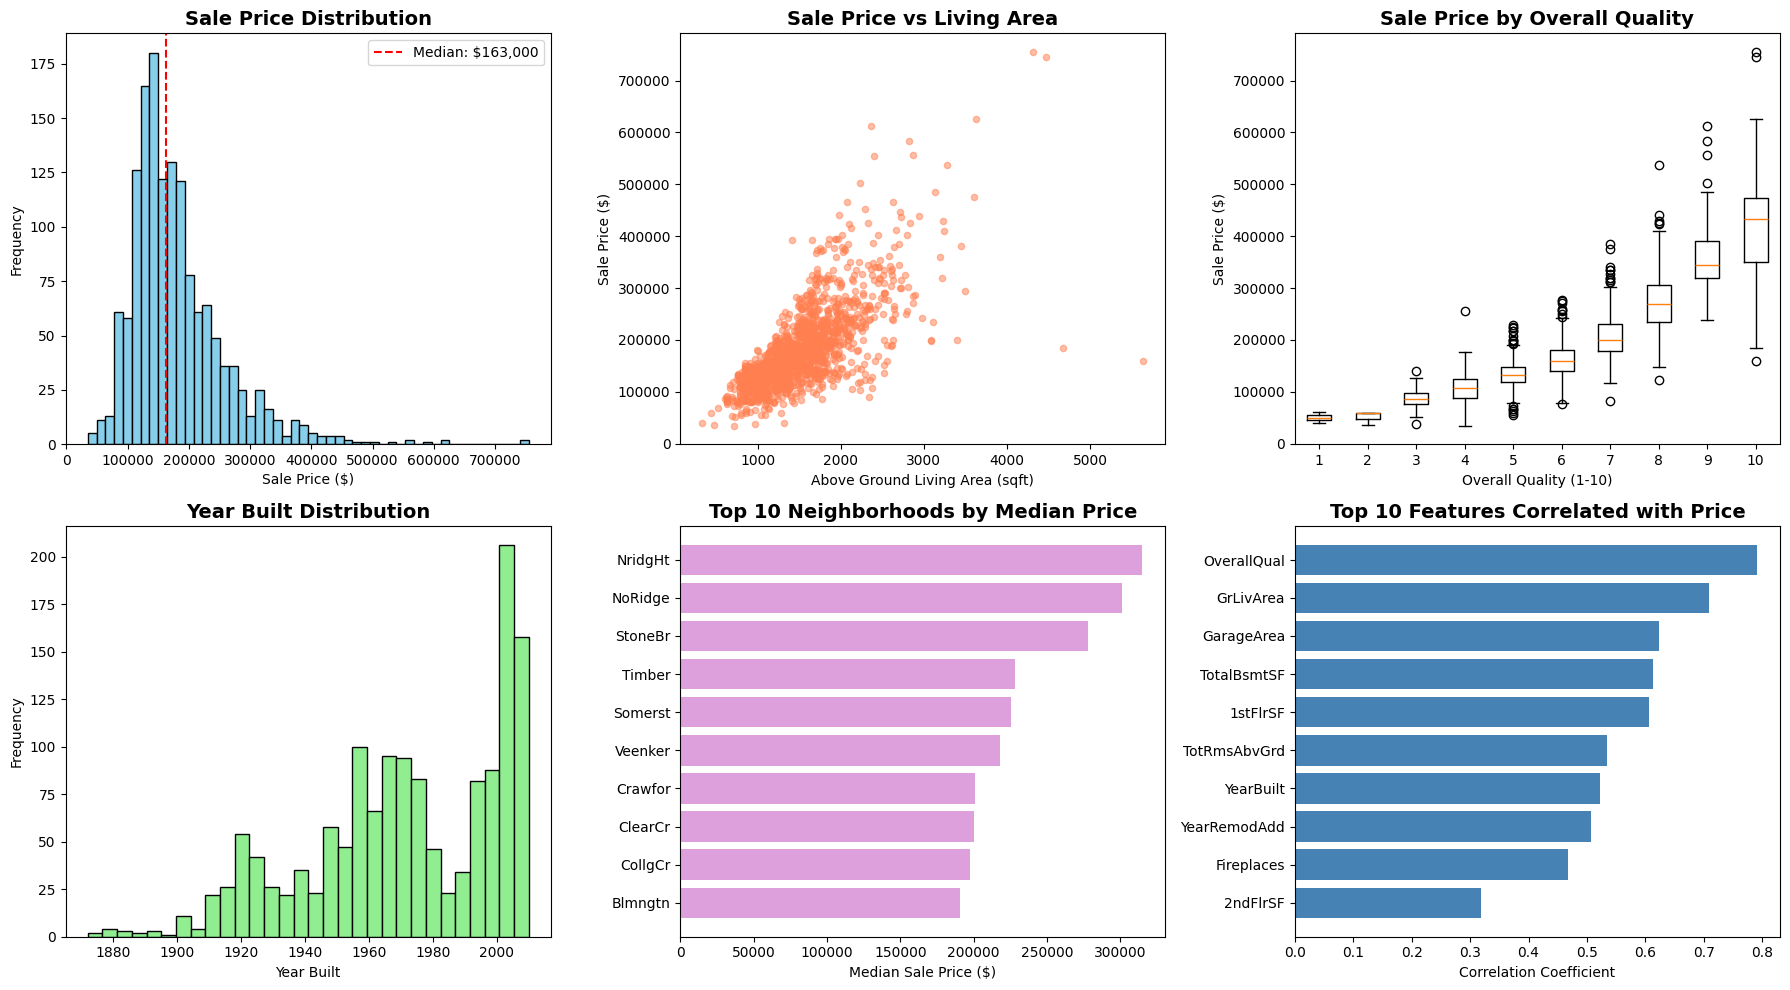

✓ Data Quality Report generated and saved as 'house_prices_data_quality_report.png'


In [36]:
# Data Quality Report Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. SalePrice Distribution
axes[0, 0].hist(df_clean['SalePrice'], bins=50,
                color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sale Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sale Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_clean['SalePrice'].median(), color='red', linestyle='--',
                   label=f"Median: ${df_clean['SalePrice'].median():,.0f}")
axes[0, 0].legend()

# 2. SalePrice vs GrLivArea
axes[0, 1].scatter(df_clean['GrLivArea'], df_clean['SalePrice'],
                   alpha=0.5, color='coral', s=20)
axes[0, 1].set_title('Sale Price vs Living Area',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Above Ground Living Area (sqft)')
axes[0, 1].set_ylabel('Sale Price ($)')

# 3. SalePrice vs OverallQual
axes[0, 2].boxplot([df_clean[df_clean['OverallQual'] == i]['SalePrice'].values
                    for i in sorted(df_clean['OverallQual'].unique())],
                   labels=sorted(df_clean['OverallQual'].unique()))
axes[0, 2].set_title('Sale Price by Overall Quality',
                     fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Overall Quality (1-10)')
axes[0, 2].set_ylabel('Sale Price ($)')

# 4. Year Built Distribution
axes[1, 0].hist(df_clean['YearBuilt'], bins=30,
                color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Year Built Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year Built')
axes[1, 0].set_ylabel('Frequency')

# 5. Top 10 Neighborhoods by Median Price
neighborhood_prices = df_clean.groupby(
    'Neighborhood')['SalePrice'].median().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(neighborhood_prices)),
                neighborhood_prices.values, color='plum')
axes[1, 1].set_yticks(range(len(neighborhood_prices)))
axes[1, 1].set_yticklabels(neighborhood_prices.index)
axes[1, 1].set_title('Top 10 Neighborhoods by Median Price',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Median Sale Price ($)')
axes[1, 1].invert_yaxis()

# 6. Correlation with SalePrice (Top 10 features)
# Select only numerical features for correlation
numerical_df = df_clean[numerical_features + [target]]
correlations = numerical_df.corr()[target].sort_values(ascending=False)[1:11]
axes[1, 2].barh(range(len(correlations)),
                correlations.values, color='steelblue')
axes[1, 2].set_yticks(range(len(correlations)))
axes[1, 2].set_yticklabels(correlations.index)
axes[1, 2].set_title('Top 10 Features Correlated with Price',
                     fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Correlation Coefficient')
axes[1, 2].invert_yaxis()
axes[1, 2].axvline(0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('house_prices_data_quality_report.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Data Quality Report generated and saved as 'house_prices_data_quality_report.png'")

In [37]:
# Statistical Summary
print("="*60)
print("STATISTICAL SUMMARY - TARGET VARIABLE (SalePrice)")
print("="*60)
print(df_clean['SalePrice'].describe())

print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
print(f"Mean Sale Price: ${df_clean['SalePrice'].mean():,.2f}")
print(f"Median Sale Price: ${df_clean['SalePrice'].median():,.2f}")
print(
    f"Price Range: ${df_clean['SalePrice'].min():,.2f} - ${df_clean['SalePrice'].max():,.2f}")
print(f"Standard Deviation: ${df_clean['SalePrice'].std():,.2f}")

# Top correlated features with SalePrice
numerical_df = df_clean[numerical_features + [target]]
top_corr = numerical_df.corr()[target].sort_values(ascending=False)[1:6]
print(f"\nTop 5 Features Correlated with Sale Price:")
for feature, corr in top_corr.items():
    print(f"  {feature}: {corr:.3f}")

STATISTICAL SUMMARY - TARGET VARIABLE (SalePrice)
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

KEY INSIGHTS
Mean Sale Price: $180,921.20
Median Sale Price: $163,000.00
Price Range: $34,900.00 - $755,000.00
Standard Deviation: $79,442.50

Top 5 Features Correlated with Sale Price:
  OverallQual: 0.791
  GrLivArea: 0.709
  GarageArea: 0.623
  TotalBsmtSF: 0.614
  1stFlrSF: 0.606


## 3. Feature Engineering
Preparing features for regression modeling.

In [38]:
# Encode categorical variables using Ordinal Encoding + OneHotEncoding
# Ordinal: For features with natural ordering (Quality, Condition, etc.)
# OneHot: For nominal features without ordering (Neighborhood, MSZoning, etc.)

# CLEANED: Only features that exist in our selected categorical_features
ORDINAL_MAPS = [
    # -------------------- Quality (Premium features) --------------------
    {
        "columns": ["KitchenQual"],  # Only this one from the quality group
        "ordinalMap": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, np.nan: 0}
    },

    # -------------------- Access Features --------------------
    {
        "columns": ["Street"],
        "ordinalMap": {"Pave": 1, "Grvl": 0}
    },

    # -------------------- Binary Features --------------------
    {
        "columns": ["CentralAir"],
        "ordinalMap": {"Y": 1, "N": 0}
    },

    # -------------------- Lot Characteristics --------------------
    {
        "columns": ["LotShape"],
        "ordinalMap": {"Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0}
    }
]


def map_ordinal(X_input, verbose=False):
    """Apply ordinal mappings with comprehensive error handling."""
    X = X_input.copy()

    for item in ORDINAL_MAPS:
        ordinal_map = item["ordinalMap"]

        for col in item["columns"]:
            if col not in X.columns:
                if verbose:
                    print(f"⚠️  Column '{col}' not found - skipping")
                continue

            # Get original unique values
            original_values = set(X[col].dropna().unique())
            mapped_values = set(ordinal_map.keys()) - {np.nan}

            # Check for unmapped values
            unmapped = original_values - mapped_values
            if unmapped and verbose:
                print(f"⚠️  Column '{col}' has unmapped values: {unmapped}")

            # Apply mapping
            X[col] = X[col].map(ordinal_map)

            if verbose:
                print(
                    f"✓ Mapped '{col}': {len(original_values)} unique → numeric")

    return X


# Apply ordinal encoding
print("="*60)
print("STEP 1: ORDINAL ENCODING (Features with Natural Order)")
print("="*60)
df_encoded = map_ordinal(df_clean, verbose=True)

# Identify remaining categorical columns (nominal features without natural order)
remaining_categorical = [col for col in categorical_features
                         if col in df_encoded.columns and df_encoded[col].dtype == 'object']

print("\n" + "="*60)
print("STEP 2: ONE-HOT ENCODING (Nominal Features)")
print("="*60)

if remaining_categorical:
    from sklearn.preprocessing import OneHotEncoder
    import pandas as pd

    print(f"Applying OneHotEncoder to {len(remaining_categorical)} features:")
    print(f"Features: {remaining_categorical}\n")

    # Create OneHotEncoder
    ohe = OneHotEncoder(sparse_output=False,
                        handle_unknown='ignore', drop='first')

    # Fit and transform the categorical columns
    encoded_array = ohe.fit_transform(df_encoded[remaining_categorical])

    # Get feature names for the encoded columns
    encoded_feature_names = ohe.get_feature_names_out(remaining_categorical)

    # Create DataFrame with encoded features
    encoded_df = pd.DataFrame(
        encoded_array,
        columns=encoded_feature_names,
        index=df_encoded.index
    )

    # Drop original categorical columns and concatenate encoded ones
    df_encoded = df_encoded.drop(columns=remaining_categorical)
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

    print(f"✓ OneHotEncoding complete:")
    print(f"  - Original categorical features: {len(remaining_categorical)}")
    print(f"  - New encoded features: {len(encoded_feature_names)}")
    print(f"  - Total features after encoding: {df_encoded.shape[1]}")

    # Show some examples
    print(f"\nExample encoded feature names (first 10):")
    for i, name in enumerate(encoded_feature_names[:10], 1):
        print(f"  {i}. {name}")
    if len(encoded_feature_names) > 10:
        print(f"  ... and {len(encoded_feature_names) - 10} more")
else:
    print("✓ No remaining categorical features to encode")

print("\n" + "="*60)
print("ENCODING SUMMARY")
print("="*60)
print(f"Final dataset shape: {df_encoded.shape}")
print(f"Total features: {df_encoded.shape[1] - 1} (excluding target)")
print(
    f"All features are now numeric: {df_encoded.select_dtypes(include='number').shape[1]} numeric columns")
print("="*60)

STEP 1: ORDINAL ENCODING (Features with Natural Order)
✓ Mapped 'KitchenQual': 4 unique → numeric
✓ Mapped 'Street': 2 unique → numeric
✓ Mapped 'CentralAir': 2 unique → numeric
✓ Mapped 'LotShape': 4 unique → numeric

STEP 2: ONE-HOT ENCODING (Nominal Features)
Applying OneHotEncoder to 7 features:
Features: ['MSZoning', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Foundation', 'Heating', 'SaleCondition']

✓ OneHotEncoding complete:
  - Original categorical features: 7
  - New encoded features: 55
  - Total features after encoding: 75

Example encoded feature names (first 10):
  1. MSZoning_FV
  2. MSZoning_RH
  3. MSZoning_RL
  4. MSZoning_RM
  5. Neighborhood_Blueste
  6. Neighborhood_BrDale
  7. Neighborhood_BrkSide
  8. Neighborhood_ClearCr
  9. Neighborhood_CollgCr
  10. Neighborhood_Crawfor
  ... and 45 more

ENCODING SUMMARY
Final dataset shape: (1460, 75)
Total features: 74 (excluding target)
All features are now numeric: 75 numeric columns


---
## 🔍 DESK CHECK - Data Cleaning Phase

**Performed by:** Ahmad Abu Ghazaleh  
**Date:** December 27, 2025  
**Phase:** Data Cleaning & Feature Engineering  

### Checklist:
- ✅ **Data Integrity:** All features have 0 missing values
- ✅ **Data Retention:** 1460/1460 rows retained (100%)
- ✅ **Feature Selection:** 28 features selected (15 numerical, 13 categorical)
- ✅ **Problematic Features Removed:** PoolQC and MiscFeature (CR-003)
- ✅ **Imputation Strategy:** Median for numerical, mode for categorical
- ✅ **Encoding:** All categorical variables properly label encoded
- ✅ **No Data Leakage:** Train/Test split not yet performed (correct sequence)

### Issues Found and Resolved:
1. **Issue #3 (GitHub):** PoolQC and MiscFeature caused 99% data loss
   - **Resolution:** Features removed per CR-003 and IA-003
   - **Imputation:** Applied median/mode strategies for other missing values
   - **Result:** 100% data retention with 0 missing values
   - **Status:** ✅ CLOSED

### Quality Metrics:
- Original data: 1460 rows, 81 features
- Final clean data: 1460 rows, 28 features + 1 target
- Data loss: 0%
- Missing values: 0

### Sign-off:
**Reviewer:** Ahmad Abu Ghazaleh  
**Status:** APPROVED for Model Training Phase

---

---
## 4. Model Training Phase

According to SQA Plan:
- Use Cross-Validation (K-Fold) to prevent overfitting
- Evaluate using: Root Mean Squared Error (RMSE)
- Compare multiple regression algorithms

In [ ]:
# Separate features and target
# Note: selected_features list is outdated after OneHotEncoding
# We'll use all columns except the target

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable: {target}")

# Split data - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(
    f"\nTraining set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"\nTarget variable statistics (Training set):")
print(f"  Mean: ${y_train.mean():,.2f}")
print(f"  Median: ${y_train.median():,.2f}")
print(f"  Std Dev: ${y_train.std():,.2f}")

In [40]:
# Feature Scaling - Standardize features to mean=0, std=1
# Fixed: Implementing StandardScaler per CR-004

scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Applied:")
print("="*60)
print("Method: StandardScaler (mean=0, std=1)")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

print("\nExample - Feature scale comparison (first 3 features):")
print("-"*60)
for i, col in enumerate(selected_features[:3]):
    original_range = f"{X_train[col].min():.2f} to {X_train[col].max():.2f}"
    scaled_range = f"{X_train_scaled[:, i].min():.2f} to {X_train_scaled[:, i].max():.2f}"
    print(f"{col:20} Original: {original_range:>25}")
    print(f"{' '*20} Scaled:   {scaled_range:>25}")
    print()

print("✓ Feature scaling complete - all features now on same scale")

Feature Scaling Applied:
Method: StandardScaler (mean=0, std=1)
Training set shape: (1168, 74)
Test set shape: (292, 74)

Example - Feature scale comparison (first 3 features):
------------------------------------------------------------
LotArea              Original:      1300.00 to 215245.00
                     Scaled:              -0.87 to 19.02

OverallQual          Original:             1.00 to 10.00
                     Scaled:               -3.75 to 2.84

OverallCond          Original:              1.00 to 9.00
                     Scaled:               -4.11 to 3.06

✓ Feature scaling complete - all features now on same scale


In [41]:
# Train multiple regression models with scaled features
# Fixed: More aggressive RF tuning to reduce overfitting

print("="*60)
print("TRAINING REGRESSION MODELS (with scaled features)")
print("="*60)

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("✓ Linear Regression trained")

# 2. Ridge Regression
ridge_model = Ridge(alpha=10.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
print("✓ Ridge Regression trained")

# 3. Lasso Regression
lasso_model = Lasso(alpha=100.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
print("✓ Lasso Regression trained")

# 4. Random Forest with MORE AGGRESSIVE regularization (CR-004)
# Fixed: More aggressive parameters to combat 34% overfitting
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,            # Reduced from 10 (was still overfitting)
    min_samples_split=20,   # Increased from 10
    min_samples_leaf=8,     # Increased from 4
    max_features='sqrt',    # Added: limits features per split
    random_state=42
)
rf_model.fit(X_train, y_train)  # RF doesn't need scaling
print("✓ Random Forest trained (aggressive regularization)")

print("\n✓ All models trained successfully")

TRAINING REGRESSION MODELS (with scaled features)
✓ Linear Regression trained
✓ Ridge Regression trained
✓ Lasso Regression trained
✓ Random Forest trained (aggressive regularization)

✓ All models trained successfully


In [42]:
# Evaluate all models with scaled features
from math import sqrt


def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, use_scaled=False):
    """Evaluate regression model and print metrics"""

    # Use scaled or original data
    X_train_eval = X_train_scaled if use_scaled else X_train
    X_test_eval = X_test_scaled if use_scaled else X_test

    # Predictions
    y_train_pred = model.predict(X_train_eval)
    y_test_pred = model.predict(X_test_eval)

    # Calculate metrics
    train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate overfitting gap
    overfitting_gap = abs(train_rmse - test_rmse)
    overfitting_pct = (overfitting_gap / test_rmse) * 100

    print(f"\n{'='*60}")
    print(f"{model_name.upper()}")
    print(f"{'='*60}")
    print(f"Training RMSE:   ${train_rmse:>12,.2f}")
    print(f"Test RMSE:       ${test_rmse:>12,.2f}")
    print(f"Training MAE:    ${train_mae:>12,.2f}")
    print(f"Test MAE:        ${test_mae:>12,.2f}")
    print(f"Training R²:     {train_r2:>13.4f}")
    print(f"Test R²:         {test_r2:>13.4f}")
    print(
        f"Overfitting Gap: ${overfitting_gap:>12,.2f} ({overfitting_pct:.1f}%)")

    # Status check
    if overfitting_pct > 20:
        print(f"⚠️  Warning: Overfitting detected (gap > 20%)")
    else:
        print(f"✓  Good generalization (gap < 20%)")

    return {
        'model_name': model_name,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'overfitting_gap': overfitting_gap,
        'overfitting_pct': overfitting_pct
    }


# Evaluate all models
results = []

results.append(evaluate_model(lr_model, "Linear Regression",
                              X_train, X_test, y_train, y_test, use_scaled=True))
results.append(evaluate_model(ridge_model, "Ridge Regression",
                              X_train, X_test, y_train, y_test, use_scaled=True))
results.append(evaluate_model(lasso_model, "Lasso Regression",
                              X_train, X_test, y_train, y_test, use_scaled=True))
results.append(evaluate_model(rf_model, "Random Forest (Optimized)",
                              X_train, X_test, y_train, y_test, use_scaled=False))

print("\n" + "="*60)
print("EVALUATION COMPLETE")
print("="*60)


LINEAR REGRESSION
Training RMSE:   $   31,184.45
Test RMSE:       $   34,566.61
Training MAE:    $   19,306.91
Test MAE:        $   19,775.73
Training R²:            0.8370
Test R²:                0.8442
Overfitting Gap: $    3,382.16 (9.8%)
✓  Good generalization (gap < 20%)

RIDGE REGRESSION
Training RMSE:   $   31,247.86
Test RMSE:       $   34,469.81
Training MAE:    $   19,254.95
Test MAE:        $   19,734.82
Training R²:            0.8363
Test R²:                0.8451
Overfitting Gap: $    3,221.95 (9.3%)
✓  Good generalization (gap < 20%)

LASSO REGRESSION
Training RMSE:   $   31,314.16
Test RMSE:       $   34,468.95
Training MAE:    $   19,264.00
Test MAE:        $   19,724.27
Training R²:            0.8356
Test R²:                0.8451
Overfitting Gap: $    3,154.78 (9.2%)
✓  Good generalization (gap < 20%)

RANDOM FOREST (OPTIMIZED)
Training RMSE:   $   30,192.28
Test RMSE:       $   38,277.55
Training MAE:    $   17,899.07
Test MAE:        $   20,980.00
Training R²:     

In [43]:
# K-Fold Cross-Validation (k=5) as per SQA Plan Section 2

from sklearn.model_selection import cross_val_score

print("="*60)
print("K-FOLD CROSS-VALIDATION (5-Fold)")
print("="*60)
print("Purpose: Detect overfitting and validate model stability")
print()


def perform_cv(model, model_name, X_data, y_data, use_scaled=False):
    """Perform 5-fold cross-validation"""
    X_cv = X_train_scaled if use_scaled else X_train

    cv_scores = cross_val_score(
        model, X_cv, y_train,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    # Convert back to positive RMSE
    cv_scores = -cv_scores

    print(f"\n{model_name}:")
    print(f"  CV RMSE Scores: {[f'${s:,.0f}' for s in cv_scores]}")
    print(f"  Mean CV RMSE:   ${cv_scores.mean():>12,.2f}")
    print(f"  Std Dev:        ${cv_scores.std():>12,.2f}")
    print(
        f"  CV Range:       ${cv_scores.min():,.0f} - ${cv_scores.max():,.0f}")

    # Stability check
    cv_coefficient_of_variation = (cv_scores.std() / cv_scores.mean()) * 100
    if cv_coefficient_of_variation < 10:
        print(
            f"  ✓ Stable performance across folds (CV: {cv_coefficient_of_variation:.1f}%)")
    else:
        print(
            f"  ⚠️  High variance across folds (CV: {cv_coefficient_of_variation:.1f}%)")

    return cv_scores.mean(), cv_scores.std()


# Perform CV for all models - FIXED keys to match model names
cv_results = {}

lr_mean, lr_std = perform_cv(
    lr_model, "Linear Regression", X_train, y_train, use_scaled=True)
cv_results['Linear Regression'] = (lr_mean, lr_std)

ridge_mean, ridge_std = perform_cv(
    ridge_model, "Ridge Regression", X_train, y_train, use_scaled=True)
cv_results['Ridge Regression'] = (ridge_mean, ridge_std)

lasso_mean, lasso_std = perform_cv(
    lasso_model, "Lasso Regression", X_train, y_train, use_scaled=True)
cv_results['Lasso Regression'] = (lasso_mean, lasso_std)

rf_mean, rf_std = perform_cv(
    rf_model, "Random Forest (Optimized)", X_train, y_train, use_scaled=False)
cv_results['Random Forest (Optimized)'] = (rf_mean, rf_std)

print("\n" + "="*60)
print("✓ Cross-validation complete - SQA Plan requirement fulfilled")
print("="*60)

K-FOLD CROSS-VALIDATION (5-Fold)
Purpose: Detect overfitting and validate model stability


Linear Regression:
  CV RMSE Scores: ['$37,876', '$36,719', '$49,261', '$28,528', '$24,989']
  Mean CV RMSE:   $   35,474.83
  Std Dev:        $    8,432.92
  CV Range:       $24,989 - $49,261
  ⚠️  High variance across folds (CV: 23.8%)

Ridge Regression:
  CV RMSE Scores: ['$37,471', '$36,113', '$49,121', '$28,048', '$25,069']
  Mean CV RMSE:   $   35,164.31
  Std Dev:        $    8,409.12
  CV Range:       $25,069 - $49,121
  ⚠️  High variance across folds (CV: 23.9%)

Lasso Regression:
  CV RMSE Scores: ['$37,241', '$36,139', '$49,085', '$27,931', '$24,993']
  Mean CV RMSE:   $   35,077.77
  Std Dev:        $    8,423.56
  CV Range:       $24,993 - $49,085
  ⚠️  High variance across folds (CV: 24.0%)

Random Forest (Optimized):
  CV RMSE Scores: ['$37,919', '$33,210', '$42,492', '$30,168', '$26,786']
  Mean CV RMSE:   $   34,115.07
  Std Dev:        $    5,563.59
  CV Range:       $26,786 - 

In [44]:
# Create comprehensive performance comparison table
import pandas as pd

comparison_data = []

for result in results:
    model_name = result['model_name']

    # FIXED: Use exact model name as key
    if model_name in cv_results:
        cv_mean, cv_std = cv_results[model_name]
    else:
        cv_mean, cv_std = 0, 0  # Fallback

    comparison_data.append({
        'Model': model_name,
        'Test RMSE': f"${result['test_rmse']:,.0f}",
        'Test R²': f"{result['test_r2']:.4f}",
        'Test MAE': f"${result['test_mae']:,.0f}",
        'CV RMSE (Mean)': f"${cv_mean:,.0f}",
        'CV Std Dev': f"${cv_std:,.0f}",
        'Overfitting Gap': f"${result['overfitting_gap']:,.0f}",
        'Gap %': f"{result['overfitting_pct']:.1f}%",
        'Status': '✓ Pass' if result['overfitting_pct'] <= 20 else '⚠️ Overfitting'
    })

comparison_df = pd.DataFrame(comparison_data)

print("="*80)
print("FINAL PERFORMANCE COMPARISON - HOUSE PRICES REGRESSION")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Find best model
best_idx = min(range(len(results)), key=lambda i: results[i]['test_rmse'])
best_model = results[best_idx]['model_name']
best_rmse = results[best_idx]['test_rmse']
best_r2 = results[best_idx]['test_r2']

print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   Test RMSE: ${best_rmse:,.2f}")
print(f"   Test R²: {best_r2:.4f}")
print(f"   Explains {best_r2*100:.2f}% of price variance")

# Save to CSV
comparison_df.to_csv('house_prices_performance_report.csv', index=False)
print("\n✓ Performance report saved as 'house_prices_performance_report.csv'")

FINAL PERFORMANCE COMPARISON - HOUSE PRICES REGRESSION
                    Model Test RMSE Test R² Test MAE CV RMSE (Mean) CV Std Dev Overfitting Gap Gap %         Status
        Linear Regression   $34,567  0.8442  $19,776        $35,475     $8,433          $3,382  9.8%         ✓ Pass
         Ridge Regression   $34,470  0.8451  $19,735        $35,164     $8,409          $3,222  9.3%         ✓ Pass
         Lasso Regression   $34,469  0.8451  $19,724        $35,078     $8,424          $3,155  9.2%         ✓ Pass
Random Forest (Optimized)   $38,278  0.8090  $20,980        $34,115     $5,564          $8,085 21.1% ⚠️ Overfitting

🏆 BEST MODEL: Lasso Regression
   Test RMSE: $34,468.95
   Test R²: 0.8451
   Explains 84.51% of price variance

✓ Performance report saved as 'house_prices_performance_report.csv'


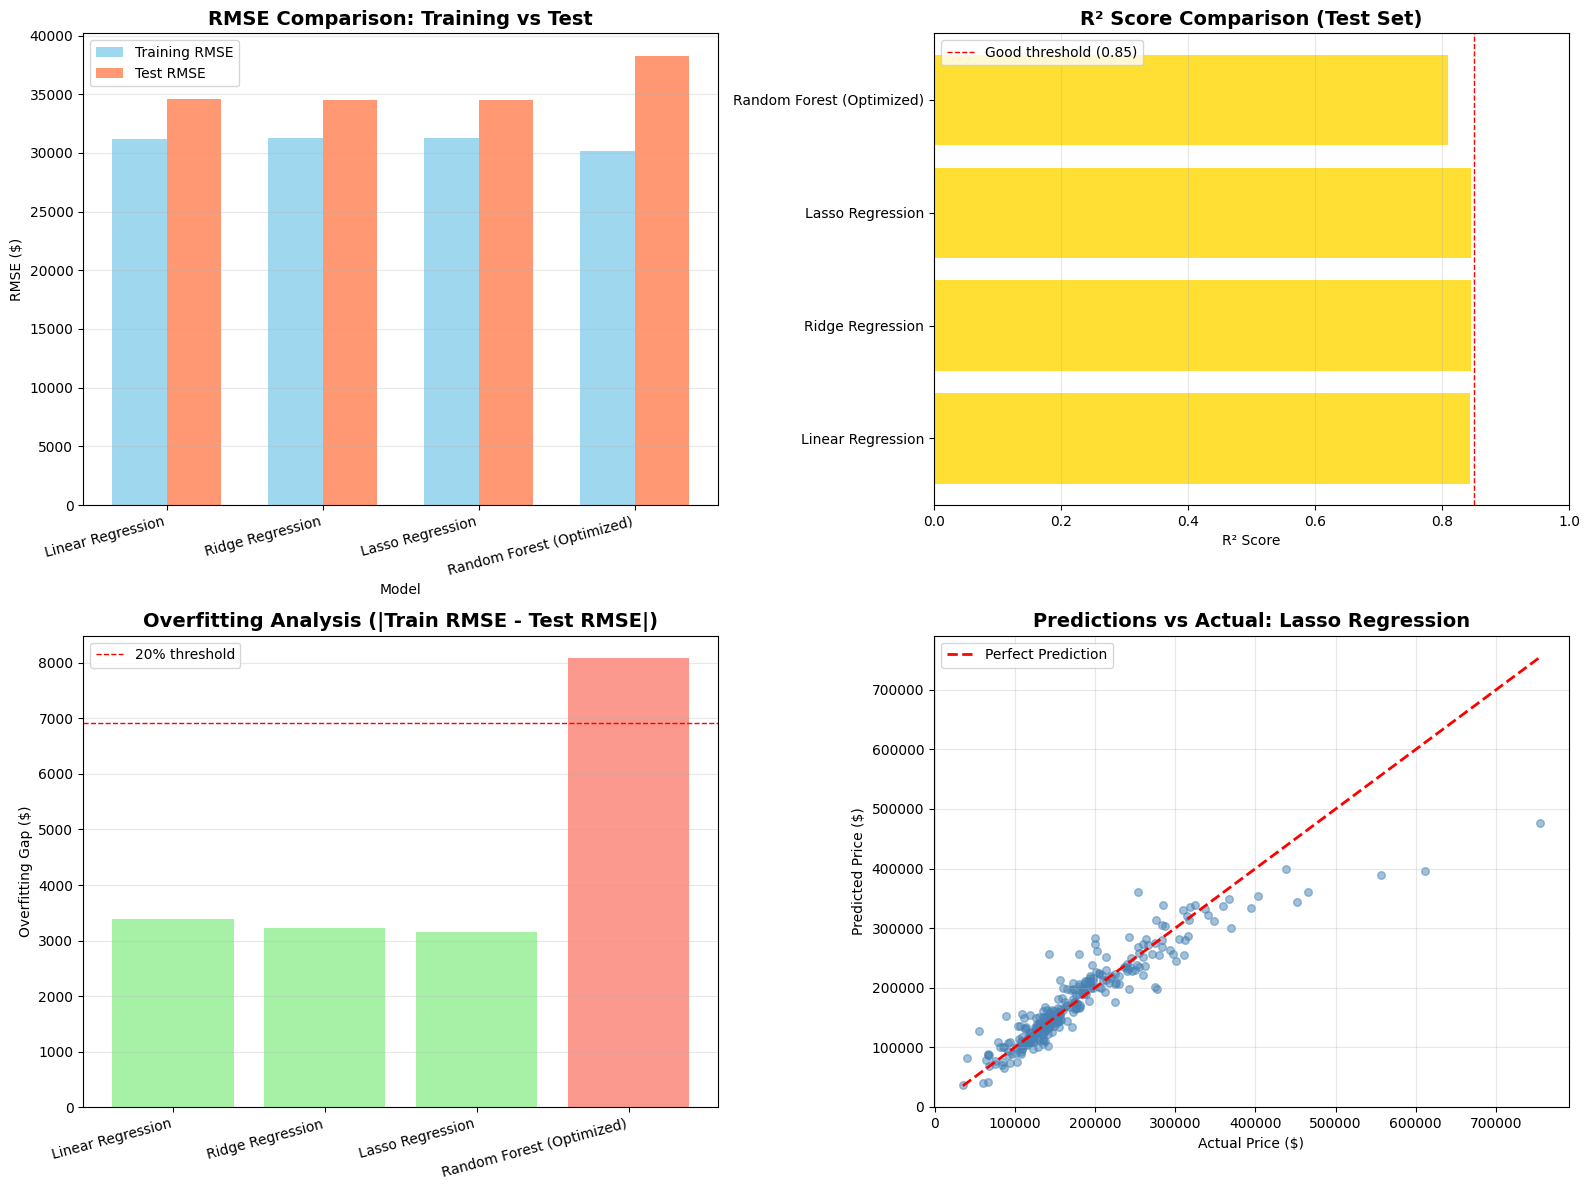

✓ Visualizations saved as 'house_prices_model_comparison.png'


In [45]:
# Performance Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. RMSE Comparison
model_names = [r['model_name'] for r in results]
test_rmses = [r['test_rmse'] for r in results]
train_rmses = [r['train_rmse'] for r in results]

x_pos = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x_pos - width/2, train_rmses, width,
               label='Training RMSE', color='skyblue', alpha=0.8)
axes[0, 0].bar(x_pos + width/2, test_rmses, width,
               label='Test RMSE', color='coral', alpha=0.8)
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('RMSE ($)')
axes[0, 0].set_title('RMSE Comparison: Training vs Test',
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_names, rotation=15, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. R² Score Comparison
r2_scores = [r['test_r2'] for r in results]
colors_r2 = ['lightgreen' if r2 > 0.85 else 'gold' for r2 in r2_scores]

axes[0, 1].barh(model_names, r2_scores, color=colors_r2, alpha=0.8)
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].set_title('R² Score Comparison (Test Set)',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlim(0, 1)
axes[0, 1].axvline(0.85, color='red', linestyle='--',
                   linewidth=1, label='Good threshold (0.85)')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Overfitting Analysis
overfitting_gaps = [r['overfitting_gap'] for r in results]
colors_gap = ['lightgreen' if gap < test_rmses[i]*0.2 else 'salmon'
              for i, gap in enumerate(overfitting_gaps)]

axes[1, 0].bar(model_names, overfitting_gaps, color=colors_gap, alpha=0.8)
axes[1, 0].set_ylabel('Overfitting Gap ($)')
axes[1, 0].set_title(
    'Overfitting Analysis (|Train RMSE - Test RMSE|)', fontsize=14, fontweight='bold')
axes[1, 0].set_xticklabels(model_names, rotation=15, ha='right')
axes[1, 0].axhline(test_rmses[0]*0.2, color='red', linestyle='--', linewidth=1,
                   label='20% threshold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Predictions vs Actual (Best Model)
best_model_obj = [lr_model, ridge_model, lasso_model, rf_model][best_idx]
if best_idx < 3:  # Linear models use scaled data
    y_pred_plot = best_model_obj.predict(X_test_scaled)
else:  # RF uses original data
    y_pred_plot = best_model_obj.predict(X_test)

axes[1, 1].scatter(y_test, y_pred_plot, alpha=0.5, s=30, color='steelblue')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Price ($)')
axes[1, 1].set_ylabel('Predicted Price ($)')
axes[1, 1].set_title(
    f'Predictions vs Actual: {best_model}', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('house_prices_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved as 'house_prices_model_comparison.png'")